# Prédiction de prix de vente de maisons
Je vais explorer les prix de vente des logements, en se basant sur une base de données de 546 lignes et 12 colonnes.
Tout d'abord, je passerai en revue une exploration approfondie des données afin d'identifier les caractéristiques les plus importantes et d'explorer l'intercorrélation entre les caractéristiques. Enfin, j'appliquerai différents algorithmes de régression et j'évaluerai leur succès respectif à un ensemble d'essais séparé en test/train.

L'import des bibliothéques nécessaires pour le travail.

In [3]:
import pandas as pd
import numpy as np  
%matplotlib inline
import matplotlib.pyplot as plt

import matplotlib


import sklearn as sk
from sklearn import metrics
import seaborn as sns
from sklearn.linear_model import LinearRegression as lr

from sklearn.model_selection import train_test_split as tts
from sklearn import ensemble, tree, linear_model
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score

Enquêter sur les données qui ont une relation linéaire ou une relation quelconque avec le prix de vente.
Abandonnez les fonctions insignifiantes ou les fonctions moins importantes.
Caractéristiques de largage qui ont de nombreuses valeurs NaN

In [2]:
data = pd.read_csv("housing.csv",sep = ";",index_col=0)
data.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
1,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
2,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
3,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
4,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
5,61000.0,6360,2,1,1,yes,no,no,no,no,0,no


In [4]:
all_na = (data.isnull().sum() / len(data)) * 100
missing_data = pd.DataFrame({'Missing Ratio' :all_na})
missing_data

,Missing Ratio
price,0.0
lotsize,0.0
bedrooms,0.0
bathrms,0.0
stories,0.0
driveway,0.0
recroom,0.0
fullbase,0.0
gashw,0.0
airco,0.0


In [5]:
data.dtypes

price       float64
lotsize       int64
bedrooms      int64
bathrms       int64
stories       int64
driveway     object
recroom      object
fullbase     object
gashw        object
airco        object
garagepl      int64
prefarea     object
dtype: object

In [6]:
new_data = data.replace(to_replace=['no', 'yes'], value=[0, 1])
new_data.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
1,42000.0,5850,3,1,2,1,0,1,0,0,1,0
2,38500.0,4000,2,1,1,1,0,0,0,0,0,0
3,49500.0,3060,3,1,1,1,0,0,0,0,0,0
4,60500.0,6650,3,1,2,1,1,0,0,0,0,0
5,61000.0,6360,2,1,1,1,0,0,0,0,0,0


In [7]:
new_data.dtypes

price       float64
lotsize       int64
bedrooms      int64
bathrms       int64
stories       int64
driveway      int64
recroom       int64
fullbase      int64
gashw         int64
airco         int64
garagepl      int64
prefarea      int64
dtype: object

In [8]:
columns = list(new_data.columns.values)
columns

['price',
 'lotsize',
 'bedrooms',
 'bathrms',
 'stories',
 'driveway',
 'recroom',
 'fullbase',
 'gashw',
 'airco',
 'garagepl',
 'prefarea']

In [9]:
for index in columns:
    df = new_data[index]
    print("---------"+index+"--------")
    print(df.describe())

---------price--------
count       546.000000
mean      68121.597070
std       26702.670926
min       25000.000000
25%       49125.000000
50%       62000.000000
75%       82000.000000
max      190000.000000
Name: price, dtype: float64
---------lotsize--------
count      546.000000
mean      5150.265568
std       2168.158725
min       1650.000000
25%       3600.000000
50%       4600.000000
75%       6360.000000
max      16200.000000
Name: lotsize, dtype: float64
---------bedrooms--------
count    546.000000
mean       2.965201
std        0.737388
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        6.000000
Name: bedrooms, dtype: float64
---------bathrms--------
count    546.000000
mean       1.285714
std        0.502158
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: bathrms, dtype: float64
---------stories--------
count    546.000000
mean       1.807692
std        0.868203
min        1.0000

# Feature Exploration
Dans cette section, j'étudierai différentes caractéristiques en les traçant pour déterminer la relation avec le prix de vente.

In [10]:
new_data.corr().abs()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
price,1.000000,0.535796,0.366447,0.516719,0.421190,0.297167,0.254960,0.186218,0.092837,0.453347,0.383302,0.329074
lotsize,0.535796,1.000000,0.151851,0.193833,0.083675,0.288778,0.140327,0.047487,0.009201,0.221765,0.352872,0.234782
bedrooms,0.366447,0.151851,1.000000,0.373769,0.407974,0.011996,0.080492,0.097201,0.046028,0.160412,0.139117,0.078953
bathrms,0.516719,0.193833,0.373769,1.000000,0.324066,0.041955,0.126892,0.102791,0.067365,0.184955,0.178178,0.064013
stories,0.421190,0.083675,0.407974,0.324066,1.000000,0.122499,0.042281,0.173860,0.018261,0.296216,0.043412,0.042940
driveway,0.297167,0.288778,0.011996,0.041955,0.122499,1.000000,0.091959,0.043428,0.011942,0.106290,0.203682,0.199378
recroom,0.254960,0.140327,0.080492,0.126892,0.042281,0.091959,1.000000,0.372434,0.010119,0.136626,0.038122,0.161292
fullbase,0.186218,0.047487,0.097201,0.102791,0.173860,0.043428,0.372434,1.000000,0.004677,0.045248,0.052524,0.228651
gashw,0.092837,0.009201,0.046028,0.067365,0.018261,0.011942,0.010119,0.004677,1.000000,0.130350,0.068144,0.059170
airco,0.453347,0.221765,0.160412,0.184955,0.296216,0.106290,0.136626,0.045248,0.130350,1.000000,0.156596,0.115626


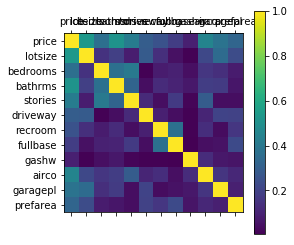

In [11]:
plt.matshow(new_data.corr().abs())
plt.xticks(range(len(new_data.columns)), new_data.columns)
plt.yticks(range(len(new_data.columns)), new_data.columns)
plt.colorbar()
plt.show()

Comme nous voyons, la correlation entre le prix et les autres variable est une correlation acceptable.

In [12]:
new_data.cov()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
price,7.130326e+08,3.102023e+07,7215.431824,6928.665793,9764.590261,2764.344907,2604.596485,2373.623779,518.642336,5637.258178,8815.633592,3726.037752
lotsize,3.102023e+07,4.700912e+06,242.776231,211.037746,157.509880,218.118255,116.398605,49.147296,-4.173650,223.906526,658.969936,215.851390
bedrooms,7.215432e+03,2.427762e+02,0.543741,0.138401,0.261186,-0.003082,0.022707,0.034214,0.007101,0.055083,0.088356,0.024687
bathrms,6.928666e+03,2.110377e+02,0.138401,0.252163,0.141284,0.007339,0.024377,0.024640,0.007077,0.043250,0.077064,0.013630
stories,9.764590e+03,1.575099e+02,0.261186,0.141284,0.753776,0.037050,0.014044,-0.072054,0.003317,0.119760,0.032463,0.015808
driveway,2.764345e+03,2.181183e+02,-0.003082,0.007339,0.037050,0.121360,0.012256,0.007222,-0.000870,0.017243,0.061115,0.029452
recroom,2.604596e+03,1.163986e+02,0.022707,0.024377,0.014044,0.012256,0.146362,0.068014,-0.000810,0.024340,0.012562,0.026165
fullbase,2.373624e+03,4.914730e+01,0.034214,0.024640,-0.072054,0.007222,0.068014,0.227862,0.000467,0.010058,0.021595,0.046282
gashw,5.186423e+02,-4.173650e+00,0.007101,0.007077,0.003317,-0.000870,-0.000810,0.000467,0.043771,-0.012700,0.012279,-0.005249
airco,5.637258e+03,2.239065e+02,0.055083,0.043250,0.119760,0.017243,0.024340,0.010058,-0.012700,0.216853,0.062809,0.022832


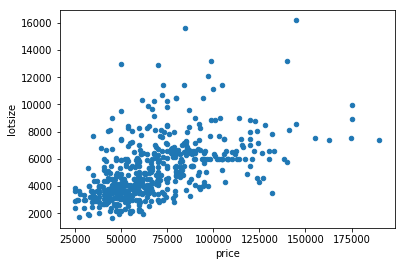

In [13]:
#Scatter Plot
new_data.plot(kind="scatter",x="price",y="lotsize")

Il y a clairement une relation linéaire avec une partie importante des valeurs aberrantes.

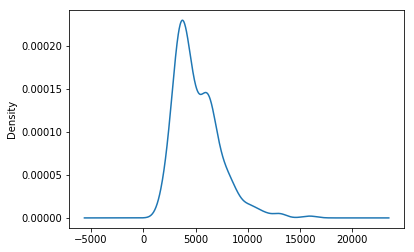

In [14]:
#Kernel Density Estimation plot
new_data["lotsize"].plot(kind="kde")

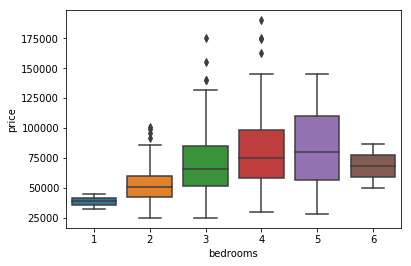

In [15]:
#new_data.plot(kind="box")
sns.boxplot(x="bedrooms",y="price",data=new_data)

Comme nous voyons, dés que le nombre de chambre à choucher augmente, le prix varie dans un intervalle important.

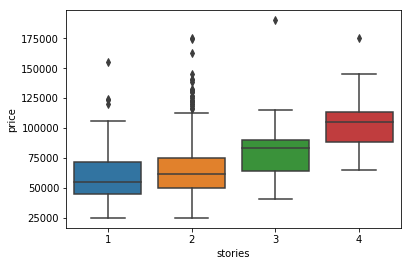

In [16]:
sns.boxplot(x="stories",y="price",data=new_data)

de contre partie pour les étages, la variance est presque la même pour 1 et 2 étages, mais diminue pour les autres cas.

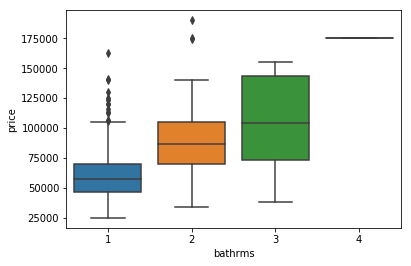

In [17]:
sns.boxplot(x="bathrms",y="price",data=new_data)

Il est possible de mettre en œuvre un algorithme de régression sur ces données.

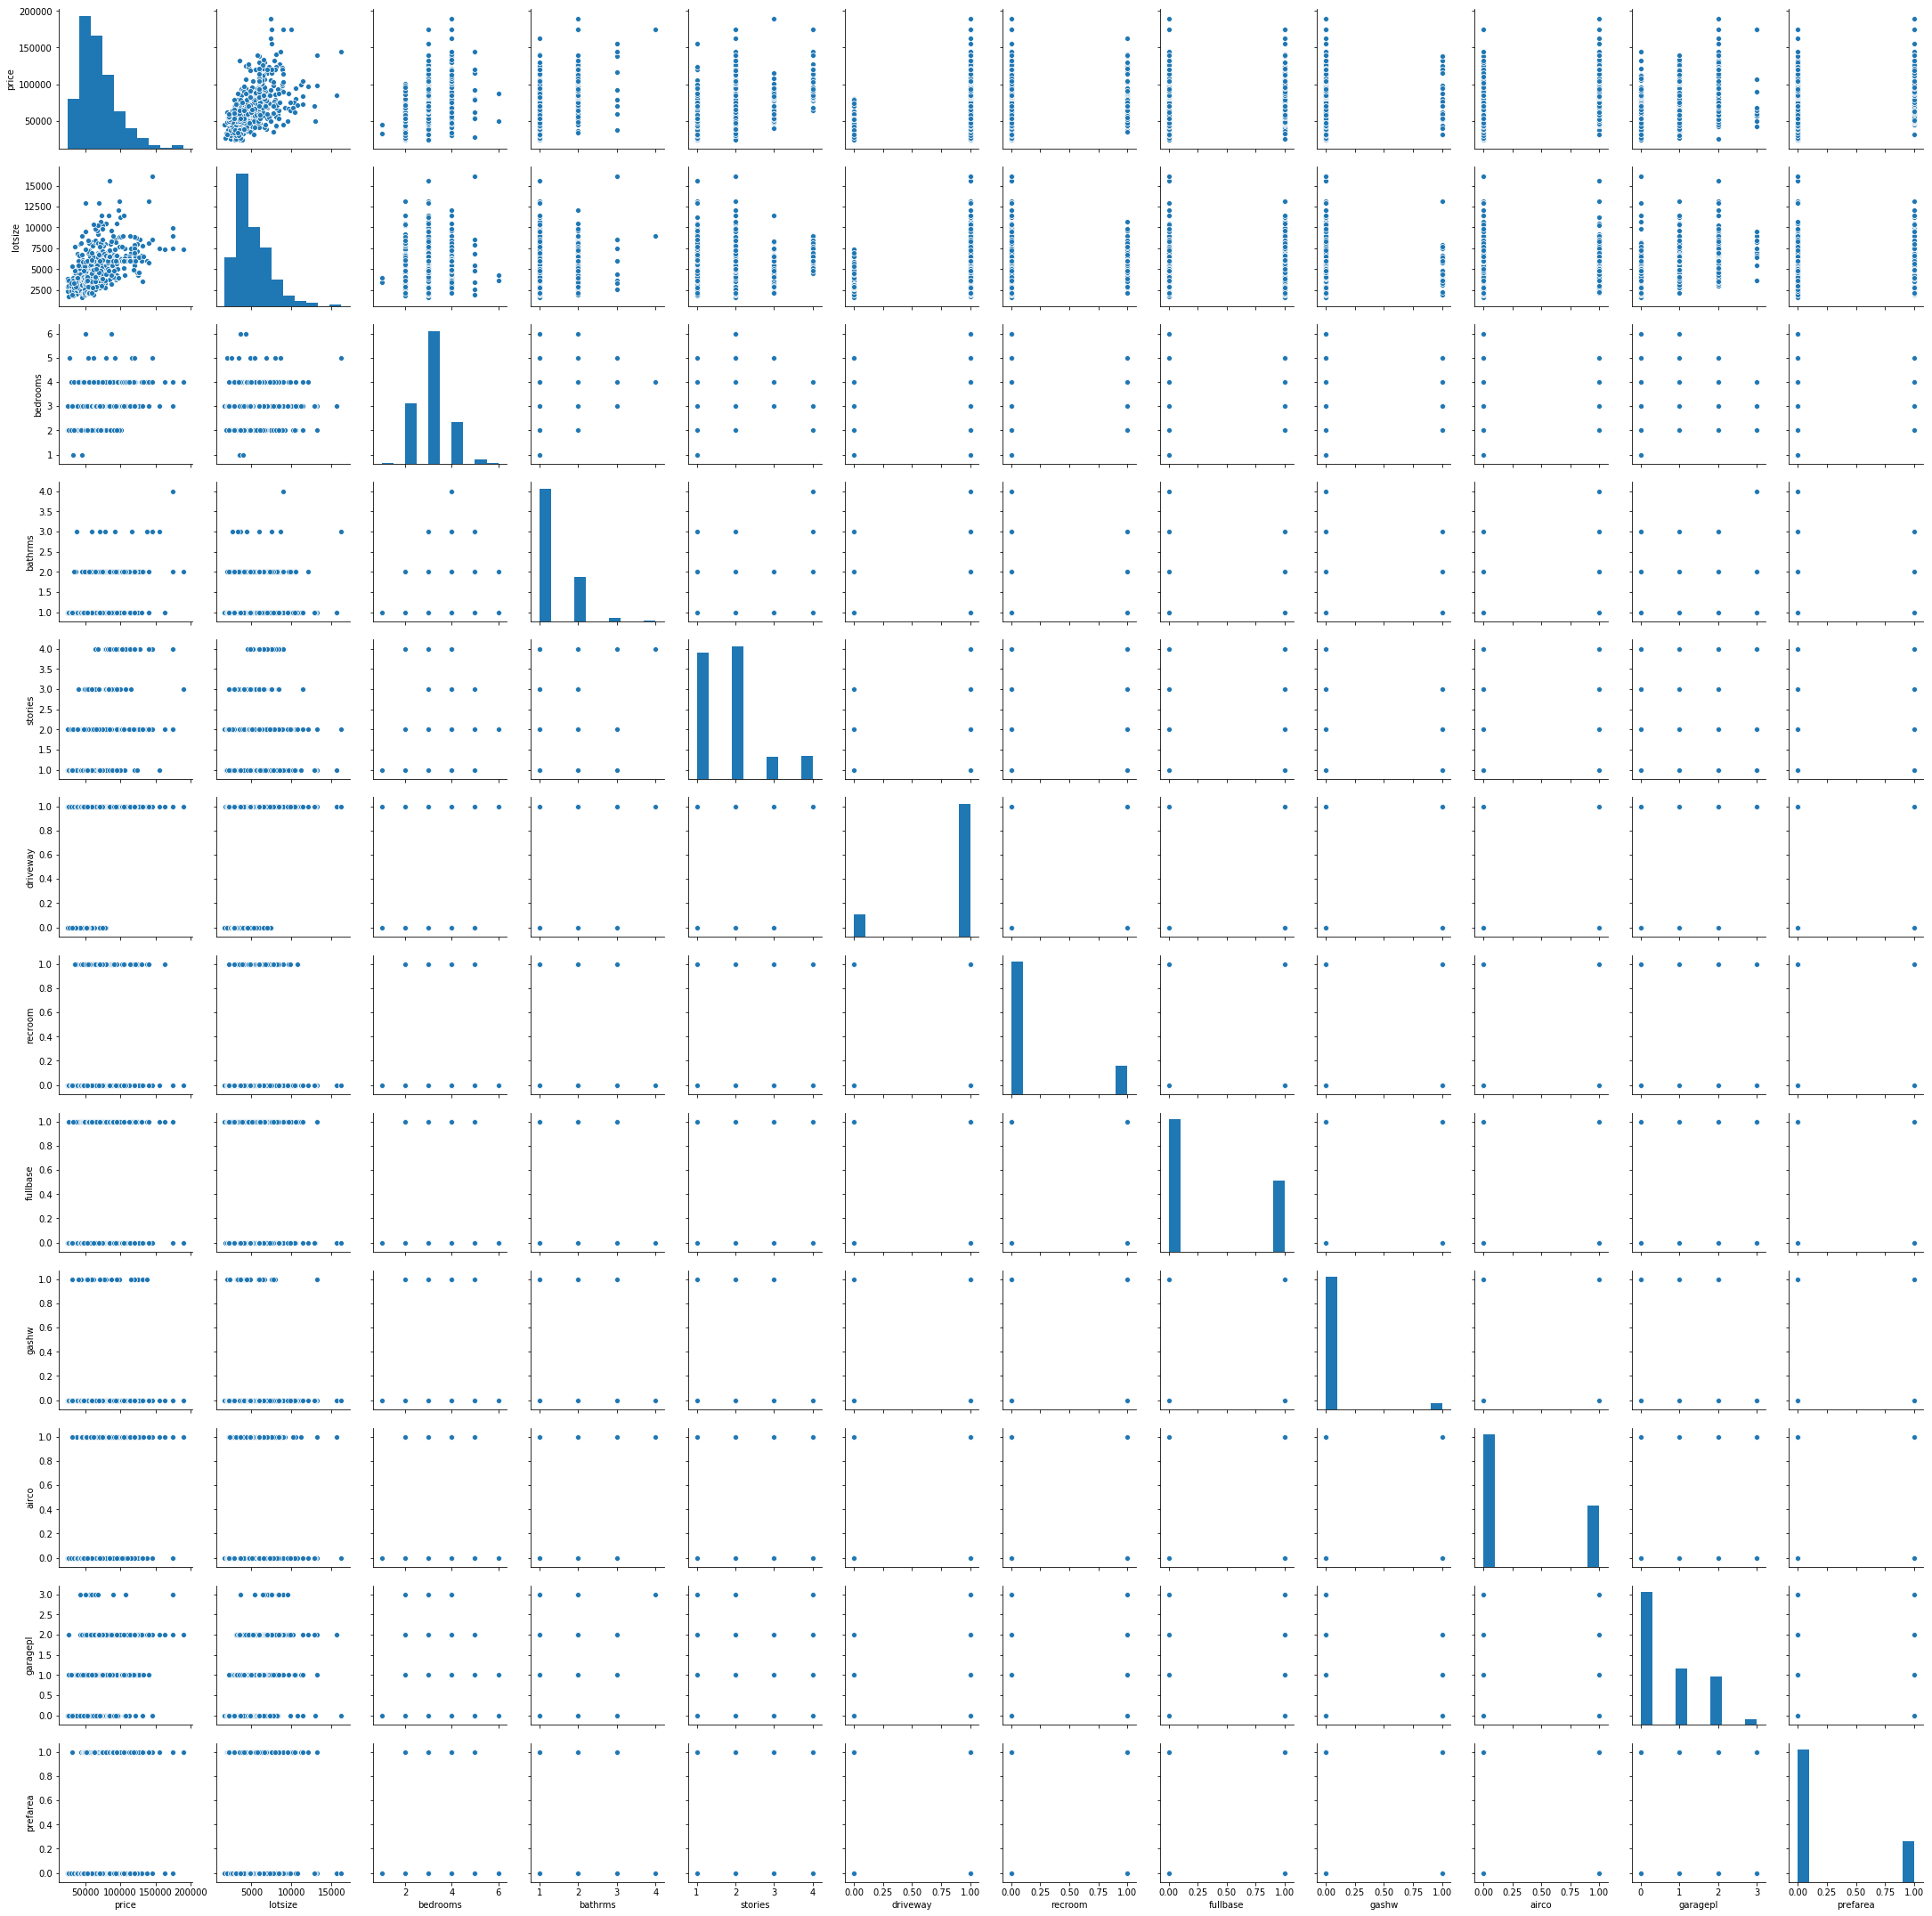

In [18]:
sns.pairplot(new_data)

Ces diagrammes de dispersion généraux confirment les résultats de la carte thermique. Il existe une myriade de corrélations linéaires entre prix et la taille.

Z:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


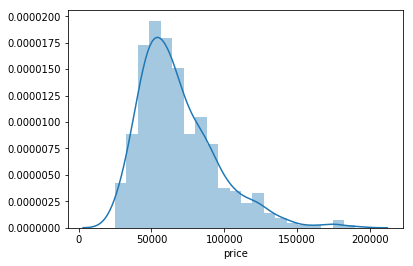

In [19]:
sns.distplot(new_data["price"])

In [20]:
from sklearn.preprocessing import StandardScaler
saleprice_scaled = StandardScaler().fit_transform(new_data['price'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.61636041]
 [-1.61636041]
 [-1.61636041]
 [-1.60717688]
 [-1.57887663]
 [-1.56013474]
 [-1.54139285]
 [-1.54139285]
 [-1.50390907]
 [-1.42894151]]

outer range (high) of the distribution:
[[2.69427416]
 [2.73175794]
 [2.88169305]
 [2.88169305]
 [3.25653084]
 [3.55640107]
 [3.98746453]
 [4.00620642]
 [4.00620642]
 [4.5684631 ]]


-Les valeurs qui se ressemblent restent proches de 0
-Les valeurs qui sont un peu étranges n'obtiennent pas de valeurs élevées, la valeur 4.5 est la valeur la plus élevée.

# Prepare Data
Commençons maintenant à nous entraîner au modèle de régression ! Nous devrons d'abord diviser nos données en un tableau x_feature qui contient les caractéristiques sur lesquelles nous devons nous entraîner, et un tableau y_target avec la variable cible, dans ce cas la colonne Prix.

In [21]:
fet = ['lotsize',
 'bedrooms',
 'bathrms',
 'stories',
 'driveway',
 'recroom',
 'fullbase',
 'gashw',
 'airco',
 'garagepl',
 'prefarea']
x_feature = new_data[fet]
y_target = new_data["price"]

In [22]:
import statsmodels.api as sm
from scipy import stats
X2 = sm.add_constant(x_feature)
est = sm.OLS(y_target, X2).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     99.97
Date:                Wed, 27 Feb 2019   Prob (F-statistic):          6.18e-122
Time:                        02:26:19   Log-Likelihood:                -6034.1
No. Observations:                 546   AIC:                         1.209e+04
Df Residuals:                     534   BIC:                         1.214e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4038.3504   3409.471     -1.184      0.2

comme nous pouvons le reconnaître sur la valeur p sur la table, toutes les caractéristiques sont significatives.

## Méthodes
Meilleurs méthodes a utilisé dans notre cas sont les méthodes linéar parcequ'on peut dire que notre modéle est un modèle linéaire.

In [24]:
X_train, X_test, Y_train, Y_test = tts(x_feature, y_target, test_size = 0.3, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(382, 11)
(164, 11)
(382,)
(164,)


Notre objectif est de créer un modèle qui généralisera bien les nouvelles données. Les données formées sont les données sur lesquelles nous appliquons l'algorithme de régression linéaire. Enfin, nous testons cet algorithme sur les données de test.

### Régression Linéaire

In [25]:
clf=lr()
clf.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [26]:
clf.coef_

array([3.89636183e+00, 2.79116044e+03, 1.45253976e+04, 6.17970685e+03,
       6.68487335e+03, 4.00163761e+03, 5.96772255e+03, 1.24075688e+04,
       1.18985209e+04, 4.43767218e+03, 1.07138101e+04])

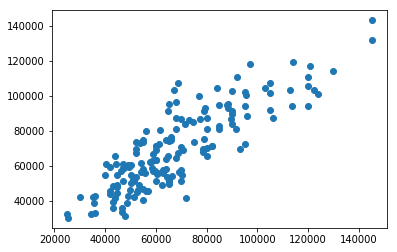

In [27]:
predictions = clf.predict(X_test)
plt.scatter(Y_test,predictions)

In [28]:
clf.intercept_

-8045.985014664664

In [29]:
print("Mean squared error: %.2f"
      % mean_squared_error(Y_test, predictions))
print('r_2 statistic: %.4f' % r2_score(Y_test, predictions))

Mean squared error: 160895880.33
r_2 statistic: 0.7090


In [30]:
accuracy=clf.score(X_test,Y_test)

"Accuracy: {}%".format(int(round(accuracy * 100)))

'Accuracy: 71%'

### Classifieur Ridge 

In [31]:
from sklearn.linear_model import Ridge as rd

clf1=rd(alpha=0.0001)
clf1.fit(X_train,Y_train)

accuracy1=clf1.score(X_test,Y_test)

"Accuracy1: {}%".format(int(round(accuracy1 * 100)))

'Accuracy1: 71%'

In [32]:
clf1.coef_

array([3.89636426e+00, 2.79116388e+03, 1.45253850e+04, 6.17970986e+03,
       6.68486058e+03, 4.00163654e+03, 5.96772194e+03, 1.24074984e+04,
       1.18985026e+04, 4.43767387e+03, 1.07137936e+04])

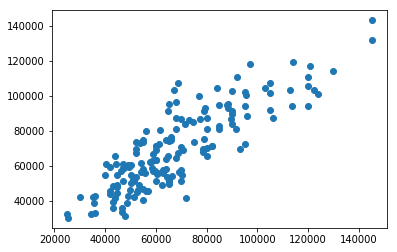

In [33]:
predictions = clf1.predict(X_test)
plt.scatter(Y_test,predictions)

In [34]:
clf1.intercept_

-8045.973165669682

In [35]:
print("Mean squared error: %.2f"
      % mean_squared_error(Y_test, predictions))
print('r_2 statistic: %.2f' % r2_score(Y_test, predictions))

Mean squared error: 160895875.66
r_2 statistic: 0.71


### Régression Lasso

In [36]:
clf = linear_model.Lasso(alpha=0.1)
clf.fit(X_train,Y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [37]:
accuracy=clf.score(X_test,Y_test)

"Accuracy: {}%".format(int(round(accuracy * 100)))

'Accuracy: 71%'

In [38]:
clf.coef_

array([3.89647646e+00, 2.79111154e+03, 1.45252575e+04, 6.17972980e+03,
       6.68410082e+03, 4.00116632e+03, 5.96755456e+03, 1.24054437e+04,
       1.18980284e+04, 4.43763913e+03, 1.07133482e+04])

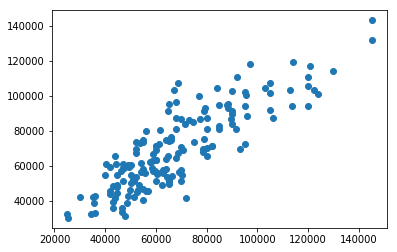

In [39]:
predictions = clf.predict(X_test)
plt.scatter(Y_test,predictions)

In [40]:
clf.intercept_

-8045.096149144243

In [41]:
print("Mean squared error: %.2f"
      % mean_squared_error(Y_test, predictions))
print('r_2 statistic: %.2f' % r2_score(Y_test, predictions))

Mean squared error: 160895272.22
r_2 statistic: 0.71


### Régression Polynomiale

In [45]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [43]:
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(X_train)
xt_poly = polynomial_features.fit_transform(X_test)

In [46]:
model = LinearRegression()
model.fit(x_poly, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [47]:
model.coef_

array([-7.09333269e-05,  5.08113448e+00,  4.78924462e+03,  5.84193818e+03,
       -1.33114729e+03, -1.10797712e+04,  4.70841848e+03,  1.97820886e+03,
       -9.45097446e+03,  1.42471235e+03, -4.30663518e+03, -1.64540998e+04,
       -4.72084962e-04,  1.69971499e-01,  8.48723970e-02, -3.62901789e-01,
        3.67546375e+00, -4.85025165e+00,  3.01264244e+00, -3.99288614e+00,
        1.55940496e+00,  2.97481385e-01, -6.15059988e-01, -3.30286208e+02,
       -2.69191494e+03,  1.38540484e+03,  4.04579225e+02,  3.66141449e+03,
       -1.05794095e+03,  1.24662303e+04, -3.51101683e+02,  1.78658720e+03,
       -3.09937580e+03,  4.27613691e+03, -1.64407618e+03,  7.07453820e+03,
       -5.14824348e+01, -1.10269084e+04, -6.63406816e+03, -1.15741659e+02,
        1.63198745e+03,  1.64053895e+04,  1.66773583e+02,  1.83725094e+03,
       -7.79380749e+03,  5.73635087e+03, -8.07151114e+03,  3.39998767e+03,
        1.13036220e+03,  4.72380874e+03, -1.10797650e+04,  2.80764168e+04,
       -5.92683405e+03,  

In [48]:
accuracy3=model.score(xt_poly, Y_test)


"Accuracy: {}%".format(int(round(accuracy3 * 100)))

'Accuracy: 57%'

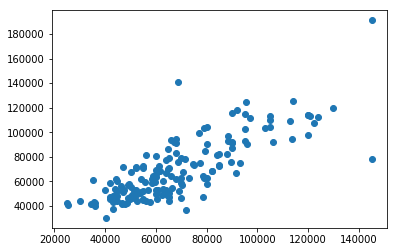

In [49]:
predictions = model.predict(xt_poly)
plt.scatter(Y_test,predictions)

In [50]:
print('Biais: %.2f' % model.intercept_)

Biais: 15972.72


In [51]:
print("Mean squared error: %.2f"
      % mean_squared_error(Y_test, predictions))
print('r_2 statistic: %.2f' % r2_score(Y_test, predictions))

Mean squared error: 239023564.92
r_2 statistic: 0.57



L'utilisation la plus courante de la régression consiste à prédire les événements qui ne se sont pas encore produits, dans notre cas, prédire le prix de la maison est la partie que nous recherchons.


# Conclusion

## Etude des resultats
* le tableau ci-dessous présente les résultats des méthodes utilisées pour prédire le prix des maisons. Comme on peut le voir, la précision, R-Squared, RSE, Coefficients ainsi que les biais sont presque égaux dans les 3 méthodes (Régression linéaire, Ridge Classifier, Régression Lasso). <br>
* R-carré égal à 0,71, cela indique que le modèle explique presque toute la variabilité des données de réponse autour de sa moyenne. <br>
* Dans le cas de la régression polynomiale, nous allons éviter les résultats de cette méthode car une précision de 57% n'est pas vraiment une bonne précision à essayer d'améliorer ainsi que le nombre de fonctionnalités utilisées dans une petite donnée.

| Algorithme | Accuracy | R2 | RSE | Coefficients | Biais |
| --- | --- | --- | --- | --- | --- |
| Régression Linéaire | 71% | 0.71 | 160895880.33 | 3.89636183e+00, 2.79116044e+03, 1.45253976e+04, 6.17970685e+03,6.68487335e+03, 4.00163761e+03, 5.96772255e+03, 1.24075688e+04,1.18985209e+04, 4.43767218e+03, 1.07138101e+04 | -8045.985014664664 |
| Classifieur Ridge  | 71% | 0.71 | 160895875.66 | 3.89636426e+00, 2.79116388e+03, 1.45253850e+04, 6.17970986e+03,6.68486058e+03, 4.00163654e+03, 5.96772194e+03, 1.24074984e+04,1.18985026e+04, 4.43767387e+03, 1.07137936e+04 | -8045.973165669682 |
| Régression Lasso  | 71% | 0.71 | 160895272.22 | 3.89647646e+00, 2.79111154e+03, 1.45252575e+04, 6.17972980e+03,6.68410082e+03, 4.00116632e+03, 5.96755456e+03, 1.24054437e+04,1.18980284e+04, 4.43763913e+03, 1.07133482e+04 | -8045.096149144243 |
| Régression Polynomiale  | 57% | 0.57 | 239023564.92 | -7.09333269e-05,  5.08113448e+00,  4.78924462e+03,  5.84193818e+03,-1.33114729e+03, -1.10797712e+04,  4.70841848e+03,  1.97820886e+03,-9.45097446e+03,  1.42471235e+03, -4.30663518e+03, -1.64540998e+04,-4.72084962e-04,  1.69971499e-01,  8.48723970e-02, -3.62901789e-01,3.67546375e+00, -4.85025165e+00,  3.01264244e+00, -3.99288614e+00,1.55940496e+00,  2.97481385e-01, -6.15059988e-01, -3.30286208e+02,-2.69191494e+03,  1.38540484e+03,  4.04579225e+02,  3.66141449e+03,-1.05794095e+03,  1.24662303e+04, -3.51101683e+02,  1.78658720e+03,-3.09937580e+03,  4.27613691e+03, -1.64407618e+03,  7.07453820e+03,-5.14824348e+01, -1.10269084e+04, -6.63406816e+03, -1.15741659e+02,1.63198745e+03,  1.64053895e+04,  1.66773583e+02,  1.83725094e+03,-7.79380749e+03,  5.73635087e+03, -8.07151114e+03,  3.39998767e+03,1.13036220e+03,  4.72380874e+03, -1.10797650e+04,  2.80764168e+04,-5.92683405e+03,  3.13687656e+04, -6.84649138e+03,  5.11809829e+03,2.91711242e+04,  4.70840767e+03, -2.99907872e+03, -1.85275240e+04,1.07023671e+04,  1.11162091e+03, -1.54069550e+04,  1.97821187e+03,2.10972048e+04, -4.41787275e+03,  1.84271207e+03,  1.43361882e+03,-9.45097711e+03, -3.41388144e+04,  5.33327078e+03,  1.17973566e+04,1.42470634e+03,  2.78893620e+03, -2.76437132e+03, -4.61203003e+03,8.44392460e+02, -1.64541005e+04 | 15972.72 |

* L'amélioration des résultats des modèles dépendra des données de la première partie, en augmentant les données ou en ajoutant d'autres caractéristiques importantes comme la date de vente, le fractionnement des données en utilisant une date spécifique va simplifier le travail. <br>
* Plus les données sont grandes, plus les résultats seront bons.